In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn import metrics


In [2]:
email_data=pd.read_csv("C:/Users/dpk/Desktop/Mechine learning/Hacker_rank/training_dataset.csv/training_dataset.csv",header=0)

In [3]:
email_data.head()

,user_id,mail_id,mail_category,mail_type,sent_time,open_time,click_time,unsubscribe_time,last_online,hacker_created_at,...,submissions_count_contest_1_days,submissions_count_contest_30_days,submissions_count_contest_365_days,submissions_count_contest_7_days,submissions_count_master,submissions_count_master_1_days,submissions_count_master_30_days,submissions_count_master_365_days,submissions_count_master_7_days,unsubscribed
0,AR+tMy3H/E+Re8Id20zUIz+amJkv6KU12o+BrgIDin0=,DQ/4I+GIOz2ZoIiK0Lg0AkwnI35XotghgUK/MYc101I=,mail_category_2,mail_type_1,1463497837,1.463541e+09,NaN,NaN,1.459520e+09,1432533023,...,0,0,0,0,13,0,0,13,0,False
1,1P4AOvdzJzhDSHi7jJ3udWv4ajpKxOn4T/rCLv4PrXU=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,mail_category_1,mail_type_1,1461357640,NaN,NaN,NaN,1.461210e+09,1432184291,...,0,3,16,0,83,0,43,83,4,False
2,OEfFUcsTAGInCfsHuLZuIgdSNtuNsg8EdfN98VUZVTs=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,mail_category_1,mail_type_1,1463499639,NaN,NaN,NaN,1.463411e+09,1433045937,...,0,0,0,0,16,0,3,16,0,False
3,1P4AOvdzJzhDSHi7jJ3udWv4ajpKxOn4T/rCLv4PrXU=,EHNBRbi6i9KO6cMHsuDPFjZVp2cY3RH+BiOKwPwzLQs=,mail_category_1,mail_type_1,1463182983,NaN,NaN,NaN,1.462768e+09,1432184291,...,0,0,16,0,85,0,9,85,0,False
4,CYRcuV0cR0algMZJ1N6+3uKcqi8iu+6tJNzmBbmgN7o=,K0y/NW59TJkYc5y0HUwDeAXrewYT0JQlkcozz0s2V5Q=,mail_category_4,mail_type_1,1461855019,NaN,NaN,NaN,1.461248e+09,1432998058,...,0,1,17,0,43,0,0,43,0,False


In [4]:
email_data.shape

(486048, 54)

In [5]:
email_data.isnull().sum()

user_id                                      0
mail_id                                      0
mail_category                              425
mail_type                                  425
sent_time                                    0
open_time                               324701
click_time                              458964
unsubscribe_time                        484090
last_online                                577
hacker_created_at                            0
hacker_timezone                           6939
clicked                                      0
contest_login_count                          0
contest_login_count_1_days                   0
contest_login_count_30_days                  0
contest_login_count_365_days                 0
contest_login_count_7_days                   0
contest_participation_count                  0
contest_participation_count_1_days           0
contest_participation_count_30_days          0
contest_participation_count_365_days         0
contest_parti

In [6]:
email_data['mail_category'].value_counts()

mail_category_15    154052
mail_category_1     104180
mail_category_3      66684
mail_category_4      42154
mail_category_13     42143
mail_category_7      26677
mail_category_10     15283
mail_category_6      13307
mail_category_9       6464
mail_category_2       5233
mail_category_8       2974
mail_category_14      1602
mail_category_5       1199
mail_category_12      1011
mail_category_11      1007
mail_category_16       910
mail_category_17       734
mail_category_18         9
Name: mail_category, dtype: int64

In [7]:
email_data['mail_type'].value_counts()

mail_type_1    288694
mail_type_3    154052
mail_type_2     42143
mail_type_4       734
Name: mail_type, dtype: int64

In [8]:
email_data[email_data['open_time'].isnull()]

,user_id,mail_id,mail_category,mail_type,sent_time,open_time,click_time,unsubscribe_time,last_online,hacker_created_at,...,submissions_count_contest_1_days,submissions_count_contest_30_days,submissions_count_contest_365_days,submissions_count_contest_7_days,submissions_count_master,submissions_count_master_1_days,submissions_count_master_30_days,submissions_count_master_365_days,submissions_count_master_7_days,unsubscribed
1,1P4AOvdzJzhDSHi7jJ3udWv4ajpKxOn4T/rCLv4PrXU=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,mail_category_1,mail_type_1,1461357640,NaN,NaN,NaN,1.461210e+09,1432184291,...,0,3,16,0,83,0,43,83,4,False
2,OEfFUcsTAGInCfsHuLZuIgdSNtuNsg8EdfN98VUZVTs=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,mail_category_1,mail_type_1,1463499639,NaN,NaN,NaN,1.463411e+09,1433045937,...,0,0,0,0,16,0,3,16,0,False
3,1P4AOvdzJzhDSHi7jJ3udWv4ajpKxOn4T/rCLv4PrXU=,EHNBRbi6i9KO6cMHsuDPFjZVp2cY3RH+BiOKwPwzLQs=,mail_category_1,mail_type_1,1463182983,NaN,NaN,NaN,1.462768e+09,1432184291,...,0,0,16,0,85,0,9,85,0,False
4,CYRcuV0cR0algMZJ1N6+3uKcqi8iu+6tJNzmBbmgN7o=,K0y/NW59TJkYc5y0HUwDeAXrewYT0JQlkcozz0s2V5Q=,mail_category_4,mail_type_1,1461855019,NaN,NaN,NaN,1.461248e+09,1432998058,...,0,1,17,0,43,0,0,43,0,False
5,UREtRIcAzBFKmMt9ZSkFLofOWKAKmzsDD7BwrdxcPuk=,UGATDXARg7jMEInKH7oXgty2nwxnwD2l0OW/8Nsa0MI=,mail_category_6,mail_type_1,1459927021,NaN,NaN,NaN,1.457962e+09,1431945704,...,0,0,13,0,88,0,0,88,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486034,vXRNRDiQLaQ9MKR+utvtM12kq6Thjff+r3bf0uqDiRQ=,EHNBRbi6i9KO6cMHsuDPFjZVp2cY3RH+BiOKwPwzLQs=,mail_category_1,mail_type_1,1463424300,NaN,NaN,NaN,1.463336e+09,1463333941,...,0,0,0,0,0,0,0,0,0,False
486035,28864YlhweJcjVQHYhfohgYVPedf9IBqOyx2A2zsIfQ=,yrkaoy+hqbMrMrzSUwxDCkUOBl3H0Yqlx/zjXUmlWnA=,mail_category_17,mail_type_4,1463425998,NaN,NaN,NaN,1.463424e+09,1463346171,...,0,0,0,0,19,19,19,19,19,False
486037,PpPm6jegpRoG8ALl+MG0D12DXB/KPEGbFGFDAKl3YNY=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,mail_category_1,mail_type_1,1463456561,NaN,NaN,NaN,1.463456e+09,1463363184,...,0,0,0,0,1,1,1,1,1,False
486041,3QLmyNBhnbpaMXCjuf62wR2cKZQ6GSUZ84kaDVflUA4=,EHNBRbi6i9KO6cMHsuDPFjZVp2cY3RH+BiOKwPwzLQs=,mail_category_1,mail_type_1,1463445703,NaN,NaN,NaN,1.463357e+09,1463341533,...,0,0,0,0,1,0,1,1,1,False


In [9]:
email_data['open_time'].fillna(0,inplace=True)

In [10]:
email_data.isnull().sum()

user_id                                      0
mail_id                                      0
mail_category                              425
mail_type                                  425
sent_time                                    0
open_time                                    0
click_time                              458964
unsubscribe_time                        484090
last_online                                577
hacker_created_at                            0
hacker_timezone                           6939
clicked                                      0
contest_login_count                          0
contest_login_count_1_days                   0
contest_login_count_30_days                  0
contest_login_count_365_days                 0
contest_login_count_7_days                   0
contest_participation_count                  0
contest_participation_count_1_days           0
contest_participation_count_30_days          0
contest_participation_count_365_days         0
contest_parti

# checking how many people opened mail where click_time is NULL

In [11]:
email_data['opened'][email_data['click_time'].isnull()].value_counts()

False    322785
True     136179
Name: opened, dtype: int64

In [12]:
email_data['click_time'].fillna(0,inplace=True)

In [13]:
email_data['unsubscribe_time'].fillna(0,inplace=True)

In [14]:
email_data['last_online'].fillna(0,inplace=True)

In [15]:
email_data['hacker_timezone']

0         18000.0
1        -25200.0
2         18000.0
3        -25200.0
4         18000.0
           ...   
486043    32400.0
486044     7200.0
486045    18000.0
486046    18000.0
486047   -25200.0
Name: hacker_timezone, Length: 486048, dtype: float64

In [16]:
#visulalizing hacker_timezone data

In [17]:
import seaborn as sns

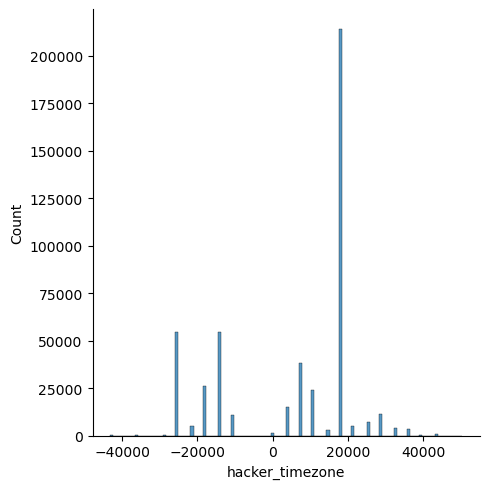

In [18]:
sns.displot(email_data['hacker_timezone'])

In [19]:
mode=email_data['hacker_timezone'].mode()[0]

In [20]:
email_data['hacker_timezone'].mean()      #mean is getting high so we will not consider it

5245.825062772772

In [21]:
email_data['hacker_timezone'].fillna(mode,inplace=True)

In [22]:
email_data.isnull().sum()

user_id                                   0
mail_id                                   0
mail_category                           425
mail_type                               425
sent_time                                 0
open_time                                 0
click_time                                0
unsubscribe_time                          0
last_online                               0
hacker_created_at                         0
hacker_timezone                           0
clicked                                   0
contest_login_count                       0
contest_login_count_1_days                0
contest_login_count_30_days               0
contest_login_count_365_days              0
contest_login_count_7_days                0
contest_participation_count               0
contest_participation_count_1_days        0
contest_participation_count_30_days       0
contest_participation_count_365_days      0
contest_participation_count_7_days        0
forum_comments_count            

In [23]:
email_data['mail_type'].value_counts()

mail_type_1    288694
mail_type_3    154052
mail_type_2     42143
mail_type_4       734
Name: mail_type, dtype: int64

In [24]:
email_data.replace({'mail_type':{'mail_type_1':1,'mail_type_2':2,'mail_type_3':3,'mail_type_4':4}},inplace=True)

In [25]:
email_data.replace({'opened':{True:1,False:0}},inplace=True)

In [26]:
email_data.head()

,user_id,mail_id,mail_category,mail_type,sent_time,open_time,click_time,unsubscribe_time,last_online,hacker_created_at,...,submissions_count_contest_1_days,submissions_count_contest_30_days,submissions_count_contest_365_days,submissions_count_contest_7_days,submissions_count_master,submissions_count_master_1_days,submissions_count_master_30_days,submissions_count_master_365_days,submissions_count_master_7_days,unsubscribed
0,AR+tMy3H/E+Re8Id20zUIz+amJkv6KU12o+BrgIDin0=,DQ/4I+GIOz2ZoIiK0Lg0AkwnI35XotghgUK/MYc101I=,mail_category_2,1.0,1463497837,1.463541e+09,0.0,0.0,1.459520e+09,1432533023,...,0,0,0,0,13,0,0,13,0,False
1,1P4AOvdzJzhDSHi7jJ3udWv4ajpKxOn4T/rCLv4PrXU=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,mail_category_1,1.0,1461357640,0.000000e+00,0.0,0.0,1.461210e+09,1432184291,...,0,3,16,0,83,0,43,83,4,False
2,OEfFUcsTAGInCfsHuLZuIgdSNtuNsg8EdfN98VUZVTs=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,mail_category_1,1.0,1463499639,0.000000e+00,0.0,0.0,1.463411e+09,1433045937,...,0,0,0,0,16,0,3,16,0,False
3,1P4AOvdzJzhDSHi7jJ3udWv4ajpKxOn4T/rCLv4PrXU=,EHNBRbi6i9KO6cMHsuDPFjZVp2cY3RH+BiOKwPwzLQs=,mail_category_1,1.0,1463182983,0.000000e+00,0.0,0.0,1.462768e+09,1432184291,...,0,0,16,0,85,0,9,85,0,False
4,CYRcuV0cR0algMZJ1N6+3uKcqi8iu+6tJNzmBbmgN7o=,K0y/NW59TJkYc5y0HUwDeAXrewYT0JQlkcozz0s2V5Q=,mail_category_4,1.0,1461855019,0.000000e+00,0.0,0.0,1.461248e+09,1432998058,...,0,1,17,0,43,0,0,43,0,False


In [27]:
email_data['mail_category'].value_counts()

mail_category_15    154052
mail_category_1     104180
mail_category_3      66684
mail_category_4      42154
mail_category_13     42143
mail_category_7      26677
mail_category_10     15283
mail_category_6      13307
mail_category_9       6464
mail_category_2       5233
mail_category_8       2974
mail_category_14      1602
mail_category_5       1199
mail_category_12      1011
mail_category_11      1007
mail_category_16       910
mail_category_17       734
mail_category_18         9
Name: mail_category, dtype: int64

In [28]:
email_data.replace({'mail_category':{'mail_category_'+str(i):i for i in range(1,19)}},inplace=True)

In [29]:
email_data.head()

,user_id,mail_id,mail_category,mail_type,sent_time,open_time,click_time,unsubscribe_time,last_online,hacker_created_at,...,submissions_count_contest_1_days,submissions_count_contest_30_days,submissions_count_contest_365_days,submissions_count_contest_7_days,submissions_count_master,submissions_count_master_1_days,submissions_count_master_30_days,submissions_count_master_365_days,submissions_count_master_7_days,unsubscribed
0,AR+tMy3H/E+Re8Id20zUIz+amJkv6KU12o+BrgIDin0=,DQ/4I+GIOz2ZoIiK0Lg0AkwnI35XotghgUK/MYc101I=,2.0,1.0,1463497837,1.463541e+09,0.0,0.0,1.459520e+09,1432533023,...,0,0,0,0,13,0,0,13,0,False
1,1P4AOvdzJzhDSHi7jJ3udWv4ajpKxOn4T/rCLv4PrXU=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,1.0,1.0,1461357640,0.000000e+00,0.0,0.0,1.461210e+09,1432184291,...,0,3,16,0,83,0,43,83,4,False
2,OEfFUcsTAGInCfsHuLZuIgdSNtuNsg8EdfN98VUZVTs=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,1.0,1.0,1463499639,0.000000e+00,0.0,0.0,1.463411e+09,1433045937,...,0,0,0,0,16,0,3,16,0,False
3,1P4AOvdzJzhDSHi7jJ3udWv4ajpKxOn4T/rCLv4PrXU=,EHNBRbi6i9KO6cMHsuDPFjZVp2cY3RH+BiOKwPwzLQs=,1.0,1.0,1463182983,0.000000e+00,0.0,0.0,1.462768e+09,1432184291,...,0,0,16,0,85,0,9,85,0,False
4,CYRcuV0cR0algMZJ1N6+3uKcqi8iu+6tJNzmBbmgN7o=,K0y/NW59TJkYc5y0HUwDeAXrewYT0JQlkcozz0s2V5Q=,4.0,1.0,1461855019,0.000000e+00,0.0,0.0,1.461248e+09,1432998058,...,0,1,17,0,43,0,0,43,0,False


In [30]:
email_data['mail_category'].mode()[0]

15.0

In [31]:
email_data['mail_type'].mode()[0]

1.0

In [32]:
email_data['mail_category'].fillna(email_data['mail_category'].mode()[0],inplace=True)

In [33]:
email_data['mail_type'].fillna(email_data['mail_type'].mode()[0],inplace=True)

In [34]:
email_data.iloc[1:4,0:5]

,user_id,mail_id,mail_category,mail_type,sent_time
1,1P4AOvdzJzhDSHi7jJ3udWv4ajpKxOn4T/rCLv4PrXU=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,1.0,1.0,1461357640
2,OEfFUcsTAGInCfsHuLZuIgdSNtuNsg8EdfN98VUZVTs=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,1.0,1.0,1463499639
3,1P4AOvdzJzhDSHi7jJ3udWv4ajpKxOn4T/rCLv4PrXU=,EHNBRbi6i9KO6cMHsuDPFjZVp2cY3RH+BiOKwPwzLQs=,1.0,1.0,1463182983


# droping coulumns which are not common with test and train data along with 1st and 2nd column

In [35]:
email_data.drop(columns=['user_id','mail_id'],axis=1,inplace=True)

In [36]:
email_data.drop(columns=['click_time','open_time','clicked','unsubscribe_time','unsubscribed'],inplace=True)

In [37]:
email_data

,mail_category,mail_type,sent_time,last_online,hacker_created_at,hacker_timezone,contest_login_count,contest_login_count_1_days,contest_login_count_30_days,contest_login_count_365_days,...,submissions_count_contest,submissions_count_contest_1_days,submissions_count_contest_30_days,submissions_count_contest_365_days,submissions_count_contest_7_days,submissions_count_master,submissions_count_master_1_days,submissions_count_master_30_days,submissions_count_master_365_days,submissions_count_master_7_days
0,2.0,1.0,1463497837,1.459520e+09,1432533023,18000.0,1,0,0,1,...,0,0,0,0,0,13,0,0,13,0
1,1.0,1.0,1461357640,1.461210e+09,1432184291,-25200.0,3,0,1,3,...,16,0,3,16,0,83,0,43,83,4
2,1.0,1.0,1463499639,1.463411e+09,1433045937,18000.0,3,0,0,3,...,0,0,0,0,0,16,0,3,16,0
3,1.0,1.0,1463182983,1.462768e+09,1432184291,-25200.0,3,0,0,3,...,16,0,0,16,0,85,0,9,85,0
4,4.0,1.0,1461855019,1.461248e+09,1432998058,18000.0,5,0,0,5,...,17,0,1,17,0,43,0,0,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486043,1.0,1.0,1463474557,1.463388e+09,1463330941,32400.0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
486044,1.0,1.0,1463488862,1.463400e+09,1463329169,7200.0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
486045,1.0,1.0,1463424341,1.463332e+09,1463331311,18000.0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
486046,1.0,1.0,1463424346,1.463336e+09,1463333888,18000.0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#converting text data to numerical data

In [39]:
email_data['opened'].value_counts()

0    324701
1    161347
Name: opened, dtype: int64

In [40]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486048 entries, 0 to 486047
Data columns (total 47 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   mail_category                         486048 non-null  float64
 1   mail_type                             486048 non-null  float64
 2   sent_time                             486048 non-null  int64  
 3   last_online                           486048 non-null  float64
 4   hacker_created_at                     486048 non-null  int64  
 5   hacker_timezone                       486048 non-null  float64
 6   contest_login_count                   486048 non-null  int64  
 7   contest_login_count_1_days            486048 non-null  int64  
 8   contest_login_count_30_days           486048 non-null  int64  
 9   contest_login_count_365_days          486048 non-null  int64  
 10  contest_login_count_7_days            486048 non-null  int64  
 11  

In [41]:
# email_data.replace({'clicked':{True:1,False:0}},inplace=True)

In [42]:
email_data.replace({'hacker_confirmation':{True:1,False:0}},inplace=True)

In [43]:
# email_data.replace({'unsubscribed':{True:1,False:0}},inplace=True)

In [44]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486048 entries, 0 to 486047
Data columns (total 47 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   mail_category                         486048 non-null  float64
 1   mail_type                             486048 non-null  float64
 2   sent_time                             486048 non-null  int64  
 3   last_online                           486048 non-null  float64
 4   hacker_created_at                     486048 non-null  int64  
 5   hacker_timezone                       486048 non-null  float64
 6   contest_login_count                   486048 non-null  int64  
 7   contest_login_count_1_days            486048 non-null  int64  
 8   contest_login_count_30_days           486048 non-null  int64  
 9   contest_login_count_365_days          486048 non-null  int64  
 10  contest_login_count_7_days            486048 non-null  int64  
 11  

In [45]:
corr=email_data.corr()

In [46]:
corr

,mail_category,mail_type,sent_time,last_online,hacker_created_at,hacker_timezone,contest_login_count,contest_login_count_1_days,contest_login_count_30_days,contest_login_count_365_days,...,submissions_count_contest,submissions_count_contest_1_days,submissions_count_contest_30_days,submissions_count_contest_365_days,submissions_count_contest_7_days,submissions_count_master,submissions_count_master_1_days,submissions_count_master_30_days,submissions_count_master_365_days,submissions_count_master_7_days
mail_category,1.000000,0.904200,0.110162,-0.000209,-0.065247,0.024091,0.045949,0.078415,-0.030903,0.042037,...,0.029821,0.062418,0.018217,0.032691,0.021370,0.046785,0.109344,-0.019810,0.040635,-0.041397
mail_type,0.904200,1.000000,0.048744,0.001576,-0.064566,0.018418,0.043756,0.050591,-0.022543,0.039782,...,0.028106,0.043489,0.014887,0.032023,0.015016,0.064865,0.101807,0.017371,0.061259,0.003857
sent_time,0.110162,0.048744,1.000000,0.054064,0.092016,0.007590,-0.065252,0.011758,-0.035554,-0.073776,...,-0.045177,0.031244,-0.017486,-0.062436,0.010901,-0.056077,0.000898,-0.007932,-0.057513,-0.026443
last_online,-0.000209,0.001576,0.054064,1.000000,0.006537,0.001512,0.014818,0.005728,0.016068,0.016496,...,0.007811,0.005309,0.010241,0.010079,0.008956,0.022853,0.006612,0.022743,0.023607,0.016498
hacker_created_at,-0.065247,-0.064566,0.092016,0.006537,1.000000,-0.072607,-0.350758,-0.018802,0.090776,-0.226750,...,-0.215942,-0.017120,-0.059639,-0.202136,-0.039291,-0.271206,0.005854,0.045085,-0.169177,0.041168
hacker_timezone,0.024091,0.018418,0.007590,0.001512,-0.072607,1.000000,0.103353,0.014142,0.020218,0.099888,...,0.041905,0.004993,0.024425,0.061256,0.018709,0.019812,-0.001486,-0.034070,0.013795,-0.021685
contest_login_count,0.045949,0.043756,-0.065252,0.014818,-0.350758,0.103353,1.000000,0.094507,0.338400,0.911173,...,0.724611,0.086302,0.312227,0.744094,0.203835,0.403025,0.006842,0.000574,0.304760,-0.016091
contest_login_count_1_days,0.078415,0.050591,0.011758,0.005728,-0.018802,0.014142,0.094507,1.000000,0.185927,0.107816,...,0.063307,0.172265,0.088023,0.083734,0.098997,0.046938,0.168162,0.049450,0.048713,0.071618
contest_login_count_30_days,-0.030903,-0.022543,-0.035554,0.016068,0.090776,0.020218,0.338400,0.185927,1.000000,0.405735,...,0.230734,0.148631,0.486227,0.312289,0.348446,0.132482,0.092277,0.275246,0.150296,0.176027
contest_login_count_365_days,0.042037,0.039782,-0.073776,0.016496,-0.226750,0.099888,0.911173,0.107816,0.405735,1.000000,...,0.635785,0.098785,0.354231,0.813730,0.233061,0.402948,0.014356,0.025090,0.373366,-0.002242


In [47]:
#constructing a heat map to observe correlation

In [48]:
import matplotlib.pyplot as plt

<Axes: >

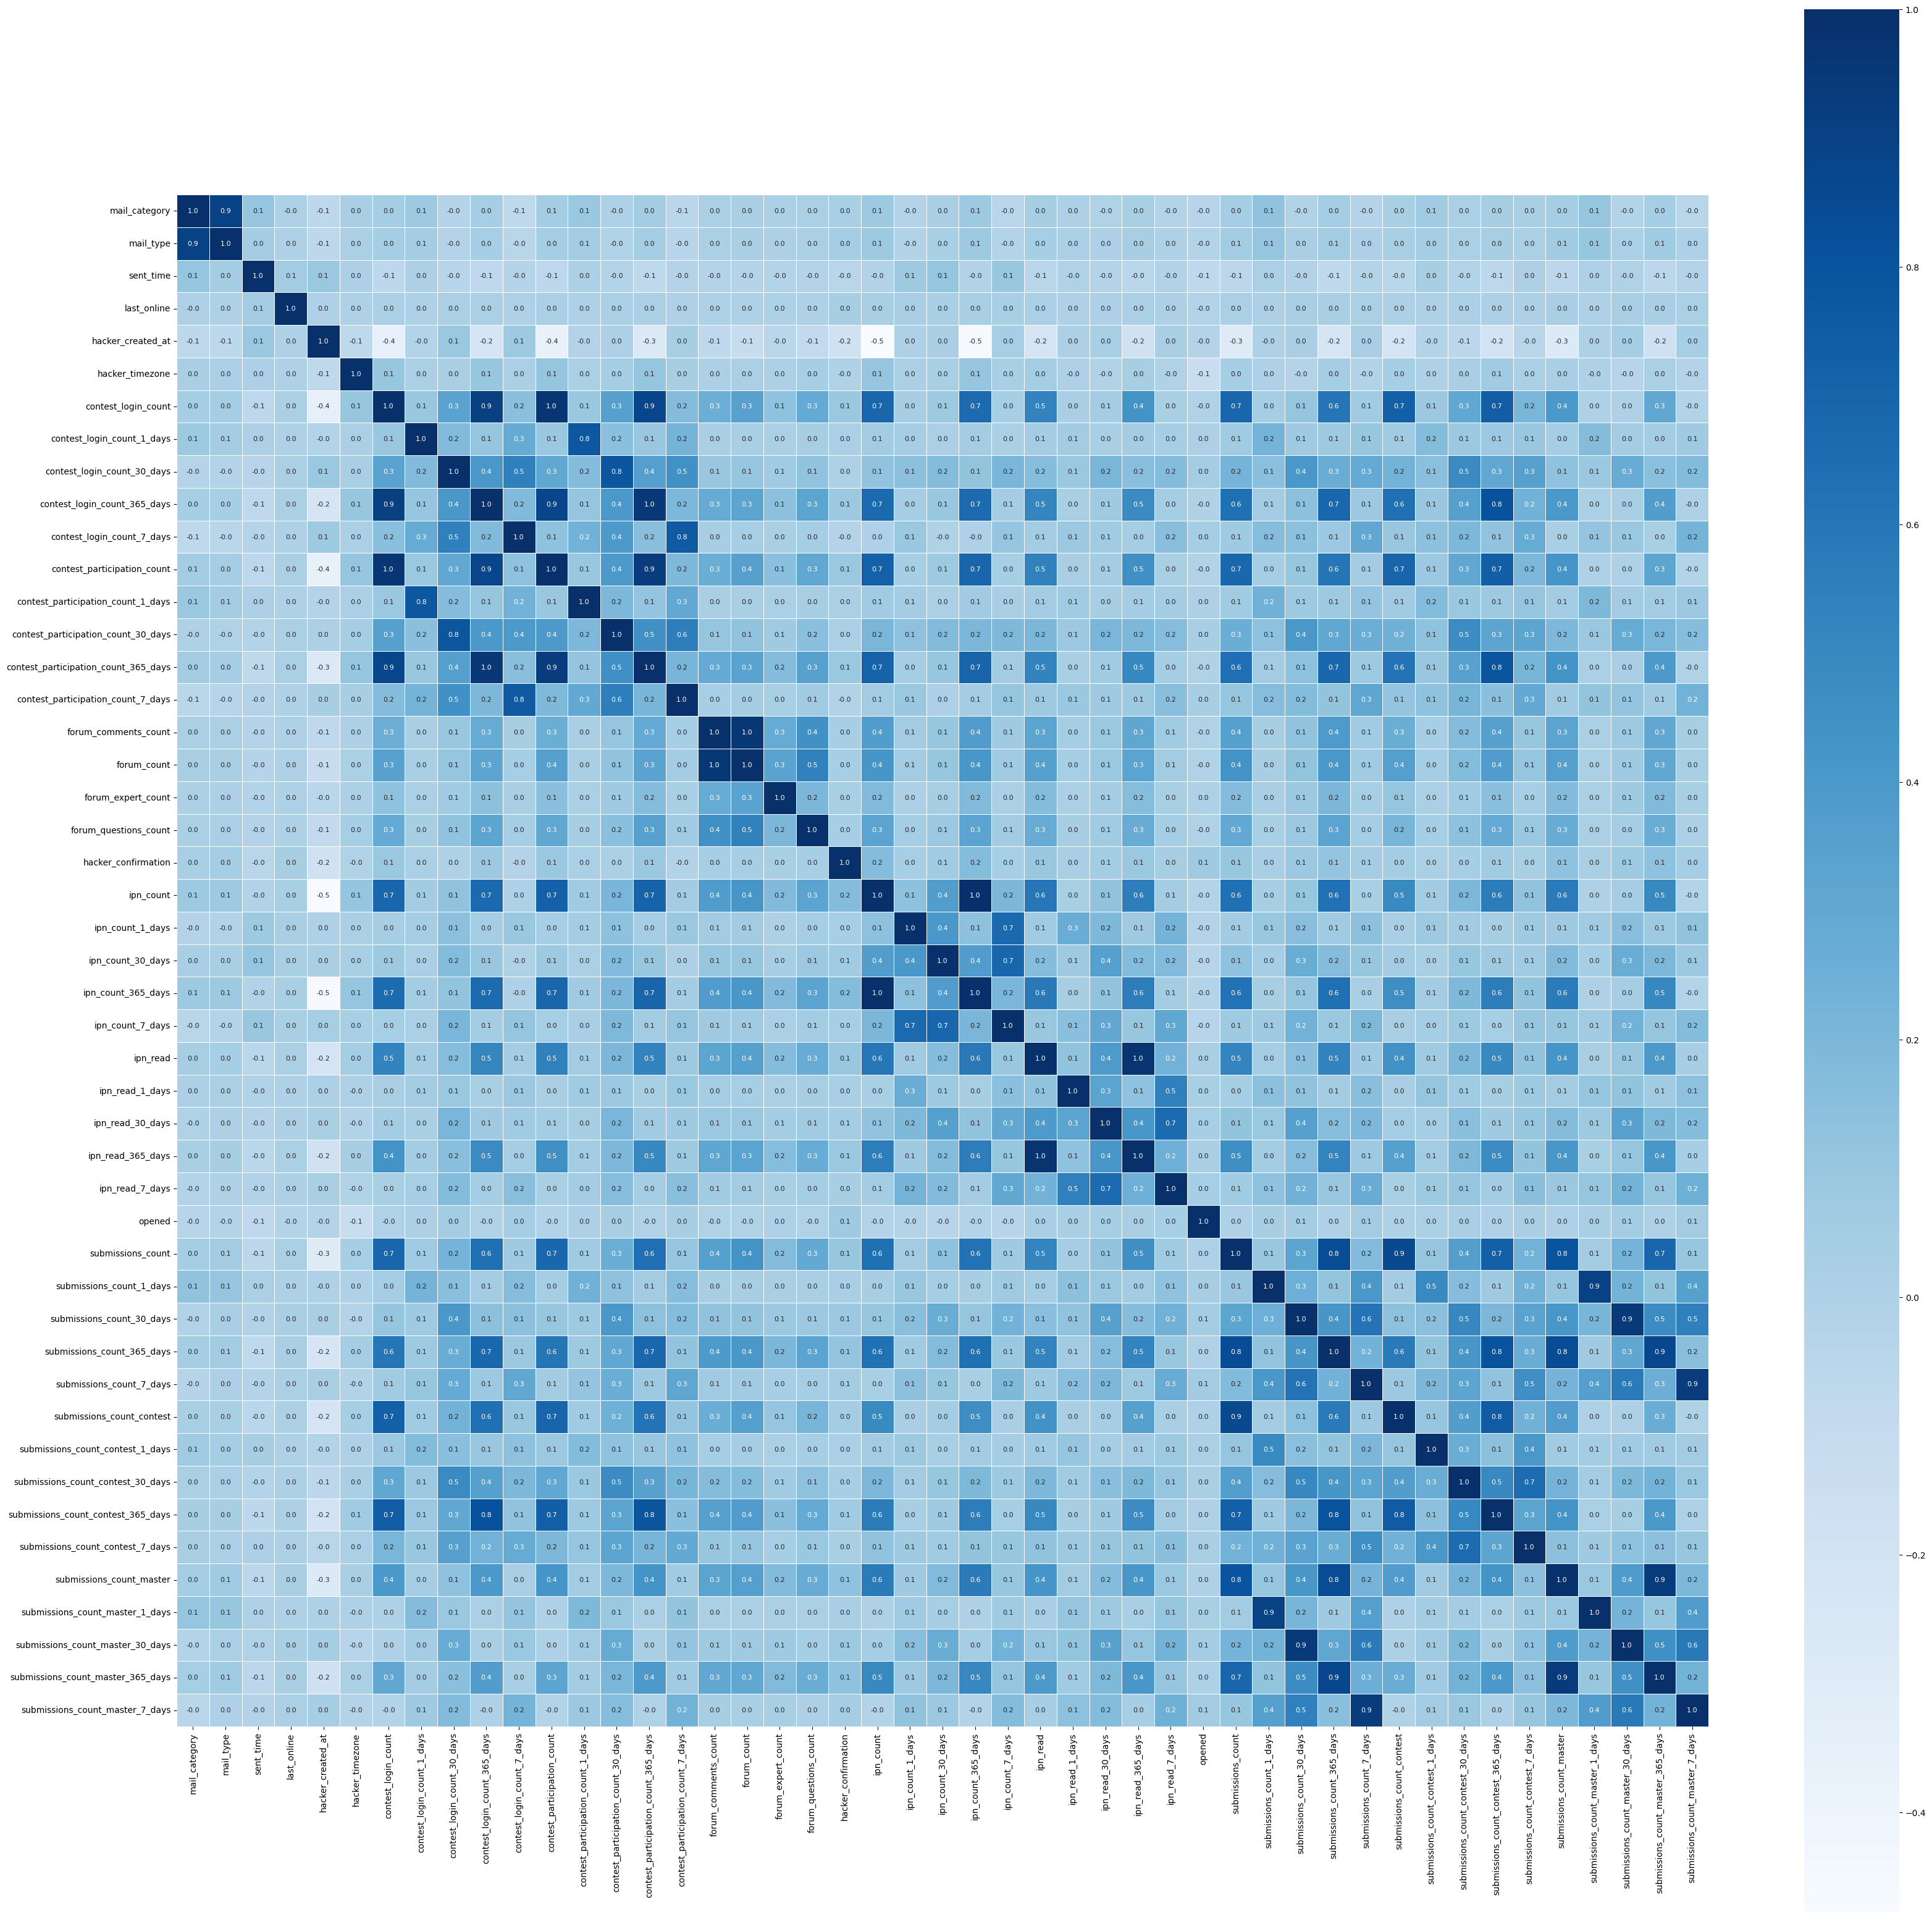

In [49]:
plt.figure(figsize=(40,40))
sns.heatmap(corr,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues',linewidth=0.5,fmt=".1f")


In [50]:
#As the values are too large ,we have to standardized the data

In [51]:
from sklearn.preprocessing import StandardScaler

# splitting data into X and Y

In [52]:
X=email_data.drop(columns='opened',axis=1)

In [53]:
Y=email_data['opened']

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=2,stratify=Y)

In [55]:
Y_train.value_counts()

0    243526
1    121010
Name: opened, dtype: int64

In [56]:
scalar=StandardScaler()

In [57]:
scalar.fit(X_train)

StandardScaler()

In [58]:
X_train_standardized=scalar.transform(X_train)

In [59]:
X_train_standardized[2]

array([ 1.1824419 ,  1.38798623, -0.72066316,  0.02690796, -2.6953295 ,
        0.71894767, -0.35110364, -0.08998296, -0.57983004, -0.51157237,
       -0.36555653, -0.39210161, -0.10574476, -0.60762923, -0.50313526,
       -0.40447076, -0.13111566, -0.15207385, -0.09245562, -0.15676025,
        0.30107261, -0.28017103,  1.17237675, -0.49325239, -0.27666781,
       -0.20391615, -0.36482699, -0.09811224, -0.25499967, -0.36066334,
       -0.19167022, -0.42930771,  2.43640881, -0.28397789, -0.48561629,
        0.11942921, -0.21467911, -0.06716084, -0.20238386, -0.2752266 ,
       -0.1491677 , -0.52648051,  2.82938636, -0.24564068, -0.51905098,
        0.19664529])

In [60]:
scalar.fit(X_test)

StandardScaler()

In [61]:
X_test_standardized=scalar.transform(X_test)

# choosing Model

In [62]:
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [63]:
def get_score(model,X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)
    return model.score(X_test,Y_test)

In [64]:
get_score(XGBRegressor(),X_train_standardized,X_test_standardized,Y_train,Y_test)

0.0776777152323147

In [65]:
get_score(LogisticRegression(),X_train_standardized,X_test_standardized,Y_train,Y_test)

0.6701971821713082

In [66]:
#get_score(SVC(),X_train_standardized,X_test_standardized,Y_train,Y_test)

In [67]:
get_score(RandomForestClassifier(),X_train_standardized,X_test_standardized,Y_train,Y_test)

0.7539419974981895

In [68]:
get_score(KNeighborsClassifier(),X_train_standardized,X_test_standardized,Y_train,Y_test)

0.6841875699519389

# implimenting cross-val-score

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
#cross_val_score(SVC(),X_train_standardized,Y_train)

In [93]:
cross_val_score(XGBRegressor(),X_train_standardized,Y_train)


array([0.1350666 , 0.12924795, 0.13459269, 0.12926362, 0.12678834])

In [94]:
cross_val_score(LogisticRegression(),X_train_standardized,Y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.67040654, 0.67095066, 0.67218511, 0.67070377, 0.6711564 ])

In [95]:
cross_val_score(RandomForestClassifier(),X_train_standardized,Y_train)


array([0.75101498, 0.7524929 , 0.75245175, 0.75374107, 0.75057265])

In [96]:
cross_val_score(KNeighborsClassifier(),X_train_standardized,Y_train)

array([0.67999396, 0.68158064, 0.68226645, 0.68335002, 0.6815395 ])

# Model choosing

In [118]:
reg=RandomForestClassifier()

In [120]:
reg.fit(X_train_standardized,Y_train)

RandomForestClassifier()

In [121]:
X_train_predicted=reg.predict(X_train_standardized)

In [122]:
X_test_predicted=reg.predict(X_test_standardized)

In [123]:
error_in_train=metrics.r2_score(X_train_predicted,Y_train)

In [124]:
error_in_train

0.9999381486406781

In [125]:
mean_square_error_1=metrics.mean_squared_error(X_train_predicted,Y_train)

In [126]:
mean_square_error_1

1.3716066451598744e-05

In [127]:
mean_square_error_for_test=metrics.mean_squared_error(X_test_predicted,Y_test)

In [128]:
mean_square_error_for_test

0.2473582856014221

In [129]:
hacker_rank_test_data=pd.read_csv("C:/Users/dpk/Desktop/Mechine learning/Hacker_rank/test_dataset.csv/test_dataset.csv",header=0)

In [130]:
hacker_rank_test_data.head()

,user_id,mail_id,mail_category,mail_type,sent_time,last_online,hacker_created_at,hacker_timezone,contest_login_count,contest_login_count_1_days,...,submissions_count_contest,submissions_count_contest_1_days,submissions_count_contest_30_days,submissions_count_contest_365_days,submissions_count_contest_7_days,submissions_count_master,submissions_count_master_1_days,submissions_count_master_30_days,submissions_count_master_365_days,submissions_count_master_7_days
0,3EwevzgIuZX9hq2zhf1Mz2C/xOd5Rf+B793bBOTSkRA=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,mail_category_1,mail_type_1,1467708425,1.467620e+09,1433145409,18000.0,1,0,...,0,0,0,0,0,21,0,0,21,0
1,blQUjF8SGLYtv1K236MnflXw0X6ie8QJHZy0SDW5Llg=,EHNBRbi6i9KO6cMHsuDPFjZVp2cY3RH+BiOKwPwzLQs=,mail_category_1,mail_type_1,1466570440,1.466483e+09,1433734262,18000.0,3,0,...,7,0,0,3,0,28,0,0,28,0
2,OEfFUcsTAGInCfsHuLZuIgdSNtuNsg8EdfN98VUZVTs=,UqjHLTfci2jErniqKM2JHBn8DurSys3+UlZOpSa32t4=,mail_category_3,mail_type_1,1463671887,1.463411e+09,1433045937,18000.0,3,0,...,0,0,0,0,0,16,0,3,16,0
3,4L/sXU2l7/1DyWK5BdEkmex0yBiyHaAW9yGPHMtrDOw=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,mail_category_1,mail_type_1,1467719224,1.467632e+09,1432109057,18000.0,2,0,...,41,0,0,41,0,1,0,0,1,0
4,0OfcrqLw8m4qYC0CLqX0DvmzBV/OQZNa9GNXQKHZdK4=,K0y/NW59TJkYc5y0HUwDeAXrewYT0JQlkcozz0s2V5Q=,mail_category_4,mail_type_1,1467723250,1.467116e+09,1432012189,18000.0,1,0,...,0,0,0,0,0,42,0,1,29,0


In [131]:
hacker_rank_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207424 entries, 0 to 207423
Data columns (total 48 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   user_id                               207424 non-null  object 
 1   mail_id                               207424 non-null  object 
 2   mail_category                         207417 non-null  object 
 3   mail_type                             207417 non-null  object 
 4   sent_time                             207424 non-null  int64  
 5   last_online                           207291 non-null  float64
 6   hacker_created_at                     207424 non-null  int64  
 7   hacker_timezone                       199784 non-null  float64
 8   contest_login_count                   207424 non-null  int64  
 9   contest_login_count_1_days            207424 non-null  int64  
 10  contest_login_count_30_days           207424 non-null  int64  
 11  

In [132]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486048 entries, 0 to 486047
Data columns (total 46 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   mail_category                         486048 non-null  float64
 1   mail_type                             486048 non-null  float64
 2   sent_time                             486048 non-null  int64  
 3   last_online                           486048 non-null  float64
 4   hacker_created_at                     486048 non-null  int64  
 5   hacker_timezone                       486048 non-null  float64
 6   contest_login_count                   486048 non-null  int64  
 7   contest_login_count_1_days            486048 non-null  int64  
 8   contest_login_count_30_days           486048 non-null  int64  
 9   contest_login_count_365_days          486048 non-null  int64  
 10  contest_login_count_7_days            486048 non-null  int64  
 11  

In [140]:
a=set(X.columns)

In [141]:
for i in a :
    print(i)

mail_category
forum_comments_count
submissions_count_contest_365_days
contest_login_count
submissions_count_7_days
submissions_count_contest_7_days
mail_type
ipn_count
submissions_count_master
submissions_count_contest_30_days
submissions_count_contest
contest_login_count_7_days
submissions_count_master_7_days
hacker_timezone
contest_participation_count_365_days
forum_expert_count
ipn_read
contest_login_count_1_days
contest_participation_count_1_days
contest_login_count_365_days
contest_participation_count_7_days
sent_time
submissions_count_master_365_days
submissions_count_master_1_days
ipn_read_1_days
submissions_count_contest_1_days
last_online
ipn_count_365_days
ipn_count_1_days
forum_count
hacker_created_at
contest_login_count_30_days
ipn_count_30_days
submissions_count_master_30_days
ipn_read_7_days
submissions_count_365_days
submissions_count_1_days
hacker_confirmation
contest_participation_count_30_days
ipn_read_30_days
submissions_count_30_days
ipn_read_365_days
contest_partic

In [142]:
len(a)

46

In [143]:
b=set(hacker_rank_test_data.columns)

In [144]:
len(b)

48

# delete the 1st and 2nd column of hacker_rank_test_data 

In [145]:
hacker_rank_test_data.drop(columns=['user_id','mail_id'],inplace=True)

In [146]:
b=set(hacker_rank_test_data.columns)

In [147]:
len(b)

46

In [149]:
hacker_rank_test_data.head()

,mail_category,mail_type,sent_time,last_online,hacker_created_at,hacker_timezone,contest_login_count,contest_login_count_1_days,contest_login_count_30_days,contest_login_count_365_days,...,submissions_count_contest,submissions_count_contest_1_days,submissions_count_contest_30_days,submissions_count_contest_365_days,submissions_count_contest_7_days,submissions_count_master,submissions_count_master_1_days,submissions_count_master_30_days,submissions_count_master_365_days,submissions_count_master_7_days
0,mail_category_1,mail_type_1,1467708425,1.467620e+09,1433145409,18000.0,1,0,0,0,...,0,0,0,0,0,21,0,0,21,0
1,mail_category_1,mail_type_1,1466570440,1.466483e+09,1433734262,18000.0,3,0,0,1,...,7,0,0,3,0,28,0,0,28,0
2,mail_category_3,mail_type_1,1463671887,1.463411e+09,1433045937,18000.0,3,0,0,3,...,0,0,0,0,0,16,0,3,16,0
3,mail_category_1,mail_type_1,1467719224,1.467632e+09,1432109057,18000.0,2,0,0,1,...,41,0,0,41,0,1,0,0,1,0
4,mail_category_4,mail_type_1,1467723250,1.467116e+09,1432012189,18000.0,1,0,0,0,...,0,0,0,0,0,42,0,1,29,0


In [150]:
hacker_rank_test_data['mail_type'].value_counts()

mail_type_1    207417
Name: mail_type, dtype: int64

In [151]:
hacker_rank_test_data.isnull().sum()

mail_category                              7
mail_type                                  7
sent_time                                  0
last_online                              133
hacker_created_at                          0
hacker_timezone                         7640
contest_login_count                        0
contest_login_count_1_days                 0
contest_login_count_30_days                0
contest_login_count_365_days               0
contest_login_count_7_days                 0
contest_participation_count                0
contest_participation_count_1_days         0
contest_participation_count_30_days        0
contest_participation_count_365_days       0
contest_participation_count_7_days         0
forum_comments_count                       0
forum_count                                0
forum_expert_count                         0
forum_questions_count                      0
hacker_confirmation                        0
ipn_count                                  0
ipn_count_

In [152]:
X.isnull().sum()

mail_category                           0
mail_type                               0
sent_time                               0
last_online                             0
hacker_created_at                       0
hacker_timezone                         0
contest_login_count                     0
contest_login_count_1_days              0
contest_login_count_30_days             0
contest_login_count_365_days            0
contest_login_count_7_days              0
contest_participation_count             0
contest_participation_count_1_days      0
contest_participation_count_30_days     0
contest_participation_count_365_days    0
contest_participation_count_7_days      0
forum_comments_count                    0
forum_count                             0
forum_expert_count                      0
forum_questions_count                   0
hacker_confirmation                     0
ipn_count                               0
ipn_count_1_days                        0
ipn_count_30_days                 

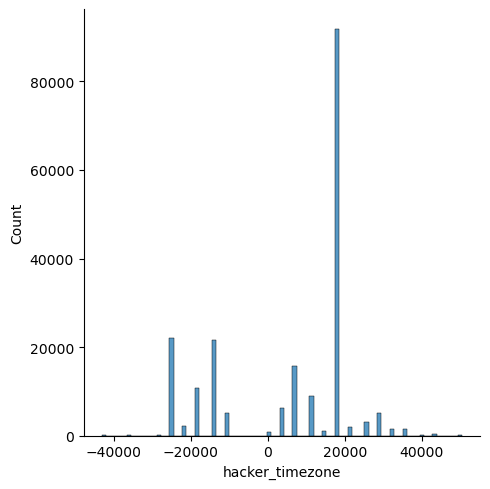

In [154]:
sns.displot(hacker_rank_test_data['hacker_timezone'])

In [155]:
hacker_rank_test_data['hacker_timezone'].mode()[0]

18000.0

In [157]:
hacker_rank_test_data['hacker_timezone'].fillna(hacker_rank_test_data['hacker_timezone'].mode()[0],inplace=True)

In [158]:
hacker_rank_test_data['last_online'].fillna(0,inplace=True)

In [166]:
hacker_rank_test_data.replace({'mail_type':{'mail_type_1':1}},inplace=True)

In [167]:
hacker_rank_test_data['mail_type'].value_counts()

1.0    207417
Name: mail_type, dtype: int64

In [160]:
hacker_rank_test_data['mail_category'].value_counts()

mail_category_1     41615
mail_category_3     28756
mail_category_4     19981
mail_category_7     16305
mail_category_10    14957
mail_category_6     13889
mail_category_2     13218
mail_category_9     11904
mail_category_14    11570
mail_category_8     11395
mail_category_12     8389
mail_category_5      7047
mail_category_16     4765
mail_category_11     3626
Name: mail_category, dtype: int64

In [168]:
hacker_rank_test_data.replace({'mail_category':{'mail_category_'+str(i):i for i in range(1,19)}},inplace=True)

In [169]:
hacker_rank_test_data['mail_category'].value_counts()

1.0     41615
3.0     28756
4.0     19981
7.0     16305
10.0    14957
6.0     13889
2.0     13218
9.0     11904
14.0    11570
8.0     11395
12.0     8389
5.0      7047
16.0     4765
11.0     3626
Name: mail_category, dtype: int64

In [177]:
hacker_rank_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207424 entries, 0 to 207423
Data columns (total 46 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   mail_category                         207417 non-null  float64
 1   mail_type                             207417 non-null  float64
 2   sent_time                             207424 non-null  int64  
 3   last_online                           207424 non-null  float64
 4   hacker_created_at                     207424 non-null  int64  
 5   hacker_timezone                       207424 non-null  float64
 6   contest_login_count                   207424 non-null  int64  
 7   contest_login_count_1_days            207424 non-null  int64  
 8   contest_login_count_30_days           207424 non-null  int64  
 9   contest_login_count_365_days          207424 non-null  int64  
 10  contest_login_count_7_days            207424 non-null  int64  
 11  

In [178]:
hacker_rank_test_data['hacker_confirmation']

0         True
1         True
2         True
3         True
4         True
          ... 
207419    True
207420    True
207421    True
207422    True
207423    True
Name: hacker_confirmation, Length: 207424, dtype: bool

In [179]:
hacker_rank_test_data.replace({'hacker_confirmation':{True:1,False:0}},inplace=True)

In [182]:
hacker_rank_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207424 entries, 0 to 207423
Data columns (total 46 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   mail_category                         207417 non-null  float64
 1   mail_type                             207417 non-null  float64
 2   sent_time                             207424 non-null  int64  
 3   last_online                           207424 non-null  float64
 4   hacker_created_at                     207424 non-null  int64  
 5   hacker_timezone                       207424 non-null  float64
 6   contest_login_count                   207424 non-null  int64  
 7   contest_login_count_1_days            207424 non-null  int64  
 8   contest_login_count_30_days           207424 non-null  int64  
 9   contest_login_count_365_days          207424 non-null  int64  
 10  contest_login_count_7_days            207424 non-null  int64  
 11  

In [183]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486048 entries, 0 to 486047
Data columns (total 46 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   mail_category                         486048 non-null  float64
 1   mail_type                             486048 non-null  float64
 2   sent_time                             486048 non-null  int64  
 3   last_online                           486048 non-null  float64
 4   hacker_created_at                     486048 non-null  int64  
 5   hacker_timezone                       486048 non-null  float64
 6   contest_login_count                   486048 non-null  int64  
 7   contest_login_count_1_days            486048 non-null  int64  
 8   contest_login_count_30_days           486048 non-null  int64  
 9   contest_login_count_365_days          486048 non-null  int64  
 10  contest_login_count_7_days            486048 non-null  int64  
 11  

# so now number of columns in X and the test_data is same , so we can directli predict the values of test_data

In [170]:
a=set(X.columns)

In [171]:
b=set(hacker_rank_test_data.columns)

In [172]:
a.difference(b)

set()

In [174]:
len(a.intersection(b))

46

In [175]:
len(a)

46

# standardazing the hacker_rank_test_data

In [180]:
scalar.fit(hacker_rank_test_data)

StandardScaler()

In [186]:
hacker_rank_test_data_standardizied=scalar.transform(hacker_rank_test_data)

In [189]:
hacker_rank_test_data_standardizied[2]

array([-0.66089254,  0.        , -1.52914829,  0.02914257, -0.47378305,
        0.69066997,  0.04847111,  0.        , -0.28153071,  0.25264319,
       -0.05631998, -0.13381018,  0.        , -0.30747098, -0.04011472,
       -0.05916989, -0.1286043 , -0.14562845, -0.07422298, -0.13173695,
        0.35088909,  0.79385939,  0.        , -0.26424654,  0.83316467,
        1.17403319, -0.31412855,  0.        , -0.12646696, -0.3112095 ,
       -0.03573835, -0.30695366, -0.04560368, -0.19563275, -0.31378915,
       -0.24750204, -0.18554529, -0.01790886, -0.1599334 , -0.24023726,
       -0.10082626, -0.31915591, -0.04254275, -0.15704394, -0.27183142,
       -0.23299513])

In [190]:
hacker_rank_test_data_standardizied.shape

(207424, 46)

In [193]:
A=np.isnan(hacker_rank_test_data_standardizied)

In [194]:
np.where(A)[0]

array([  8437,   8437,  43373,  43373,  52742,  52742,  53646,  53646,
        58618,  58618,  70405,  70405, 142683, 142683], dtype=int64)

In [195]:
hacker_rank_test_data_no_null=np.nan_to_num(hacker_rank_test_data_standardizied,nan=0)

# predicting the hacker_rank_test_data

In [196]:
hacker_rank_test_data_prediction=reg.predict(hacker_rank_test_data_no_null)

In [197]:
hacker_rank_test_data_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [198]:
np.where(hacker_rank_test_data_prediction==1)[0]

array([    27,     36,     49, ..., 207416, 207417, 207419], dtype=int64)

AttributeError: module 'pandas' has no attribute 'to_excel'

In [202]:
df=pd.DataFrame(hacker_rank_test_data_prediction)

In [204]:
df.value_counts()

0    180193
1     27231
dtype: int64

In [205]:
len(df)

207424

In [207]:
len(hacker_rank_test_data)

207424

In [208]:
df.to_csv('C:/Users/dpk/Desktop/Mechine learning/prediction.csv',index=False)